In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Defining parameters
k = 0.00035         #specifc rate of flux decrease [1/day]
d = 0.01          #specific mortality rate of predator [1/day] 
c = 0.01           #conversion factor from particle feeder to predator
b = 123.           #rate coefficient for predation on particle feeder [m^3g/C*day]
sigma = 1.        #particle feeding coefficient [m^2gC^-1]
a = 0.3           #conversion factor from particle to particle feeder [dimensionless]
z = 4000          #distance below euphotic zone [m]






In [3]:
EF = 6340, 2100,2330,4940,3810,10080
Export_Flux = np.array(EF)    # setting an array for the export flux values taken from Smith et al. 2018

In [4]:
Fs = Export_Flux*np.exp(-k*z)     # calculating the steady-state flux at depth=4000m
print(Fs)   #checking values and comparing to Smith et al 2018 paper

[ 1563.42475139   517.85362428   574.57092598  1218.18900187   939.53443262
  2485.69739653]


Smith et al., 2018 had POC flux values of:
1480, 590, 1010, 1210, 1180, 2600

In [5]:
POC_values = (1480, 590, 1010, 1210, 1180, 2600)

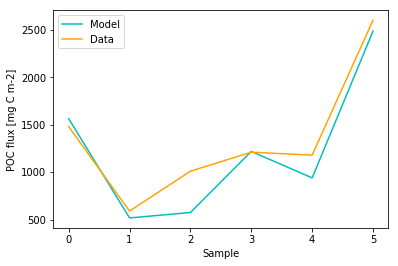

In [6]:
#plotting POC flux over 6 different samples
#plotting data to compare to the model 
plt.figure()
plt.plot(Fs,'c', label = 'Model')
plt.plot(POC_values,'orange', label = 'Data')
plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')
plt.legend()

In [7]:
Ps = d/b*c     #calculating the Steady-state concentration of particle feeders
print(Ps)      #gives only one value 

8.130081300813008e-07


In [8]:
Qs = ((a*sigma*Export_Flux)/b)*np.exp(-k*z)    # calculating the Steady-state predator concentration


In [9]:
F_P_C = (Export_Flux*np.exp(-k*z)) - Qs - Ps

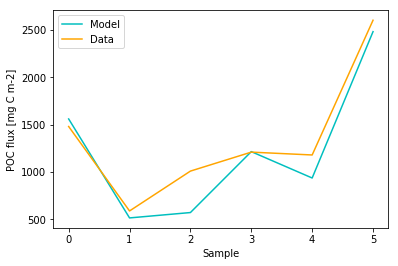

In [10]:
#plotting POC flux to 4000 meters after adding a negative predator term and a negative particle feeder term 
plt.figure()
plt.plot(F_P_C,'c', label = 'Model')
plt.plot(POC_values, 'orange', label = 'Data')
plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')
plt.legend()

In [11]:
#Checking array with negative term (particle feeder) and added term (predator)
print(F_P_C)

[ 1559.61151948   516.59056584   573.16953267  1215.21780837   937.24288441
  2479.63471914]


In [12]:
#changing the depth paramter to see the difference in POC flux 

z2 = 1000
z3 = 500

In [13]:
F_P_C2 = (Export_Flux*np.exp(-k*z2)) - Qs - Ps


Text(0.5,1,'POC flux to 1000m')

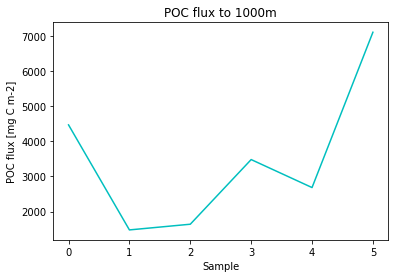

In [14]:
#plotting POC flux to 1000 meters after adding a negative predator term and a negative particle feeder term 
plt.figure()
plt.plot(F_P_C2,'c', label = 'Model')

plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')
plt.title('POC flux to 1000m')

Text(0.5,1,'POC flux to 500m')

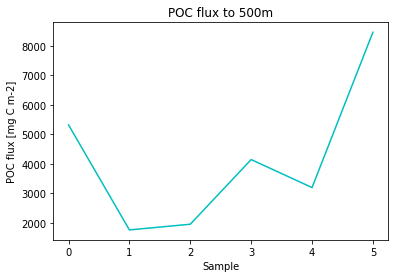

In [15]:
F_P_C3 = (Export_Flux*np.exp(-k*z3)) - Qs - Ps


#plotting POC flux to 500 meters after adding a negative predator term and a negative particle feeder term 
plt.figure()
plt.plot(F_P_C3,'c', label = 'Model')
plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')
plt.title("POC flux to 500m")

When changing the depth of POC flux there is a difference in amount of POC flux falling. When increasing the depth the POC flux becomes smaller and when you decrease the depth, the POC becomes larger. 

In [17]:
#changing k to see affect 
k2 = 0.0035         #specifc rate of flux decrease [1/day]
d = 0.01          #specific mortality rate of predator [1/day] 
c = 0.01           #conversion factor from particle feeder to predator
b = 123.           #rate coefficient for predation on particle feeder [m^3g/C*day]
sigma = 1.        #particle feeding coefficient [m^2gC^-1]
a = 0.3           #conversion factor from particle to particle feeder [dimensionless]
z = 4000          #distance below euphotic zone [m]


Text(0.5,0,'Sample')

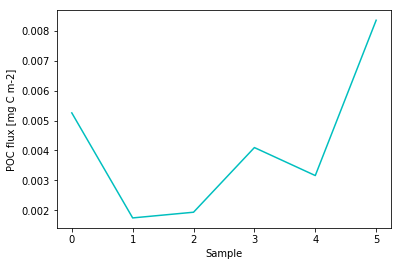

In [18]:
F_P_C = (Export_Flux*np.exp(-k2*z)) - ((a*sigma*Export_Flux)/b)*np.exp(-k2*z) - d/b*c


#plotting POC flux to 500 meters after adding a negative predator term and a negative particle feeder term 
plt.figure()
plt.plot(F_P_C,'c', label = 'Model')
plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')


The higher the specific rate of flux decrease the lower the amount of flux makes it to the depth. This is because it is the amount of flux that gets tampered off before reaching the depth. 

In [19]:
#changing sigma to see affect 
k = 0.00035         #specifc rate of flux decrease [1/day]
d = 0.01          #specific mortality rate of predator [1/day] 
c = 0.01           #conversion factor from particle feeder to predator
b = 123.           #rate coefficient for predation on particle feeder [m^3g/C*day]
sigma2 = 100.        #particle feeding coefficient [m^2gC^-1]
a = 0.3           #conversion factor from particle to particle feeder [dimensionless]
z = 4000          #distance below euphotic zone [m]


Text(0.5,0,'Sample')

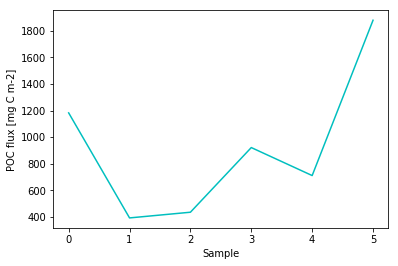

In [20]:
F_P_C = (Export_Flux*np.exp(-k*z)) - ((a*sigma2*Export_Flux)/b)*np.exp(-k*z) - d/b*c


#plotting POC flux to 500 meters after adding a negative predator term and a negative particle feeder term 
plt.figure()
plt.plot(F_P_C,'c', label = 'Model')
plt.ylabel('POC flux [mg C m-2]')
plt.xlabel('Sample')


Changing sigma, the particle feeding coefficient, changes the POC flux. The higher the sigma value the less POC falling to depth. This means that the particle feeders are taking more particles out of the water and less of it is making it down to depth. 

In [21]:
# checking the time scale for the partcile feeders to change
#this will be used to check if making a model with a time dimension would be useful to see the seasonal changes 

time_scale = 1/(a*sigma*Fs)
print(time_scale)


[ 0.00213207  0.00643683  0.00580143  0.0027363   0.00354786  0.00134101]


The time scale for the particle feeders is very small as shown above. These values are in days so over a long time period it might be useful to understand seasonal changes that occur for the POC flux to 4000 meters depth. 